## Exploratory Data Analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df = pd.read_csv('Counsumption_by_liquor_1.csv')
df


,Country,Recorded Consumption,Unrecorded Consumption,Beer (%),Wine (%),Spirits (%),Other (%),2025 projection,2030 projection
0,Estonia,11.8,1.1,35.3,16.9,38.2,9.7,11.1,12.2
1,Lithuania,11.0,0.8,42.5,7.7,45.2,4.6,11.7,12.1
2,Czech Republic,12.9,0.4,52.7,21.8,25.4,0.1,13.4,13.2
3,Seychelles,13.3,0.5,42.0,20.8,33.7,3.5,12.1,11.7
4,Germany,11.1,0.4,50.5,29.9,19.6,0.1,12.1,11.6
...,...,...,...,...,...,...,...,...,...
373,Bangladesh,0.1,0.1,11.1,2.4,86.3,0.1,0.1,0.1
374,Kuwait,0.1,0.1,0.0,0.0,0.0,0.1,0.1,0.1
375,Libya,0.1,0.1,6.8,10.5,32.6,50.2,0.1,0.1
376,Mauritania,0.1,0.1,0.0,0.0,0.0,50.2,0.1,0.1


In [17]:
df = df.drop_duplicates()

### KPI's : 
##### 1. Bar Plot  ---> Top 10 countries by total recorded consumption.
##### 2. Bar Plot  ---> Type of alcohol by recorded consumption for top 10 countries.
##### 3. Pie Chart ---> Total consumtion by alcohol type. 
##### 4. Bar Plot  ---> Actual vs projected consumption.
### KPI's (Pertaining to India, China, Nepal, Pakistan) :
##### 5. Heat Map  ---> Comparing the consumption in India with few neighbouring countries.
##### 6. Scatter Plot  ---> Recorded consumption with respect to beer.
##### 7. Scatter Plot  ---> Recorded consumption with respect to wine.
##### 8. Scatter Plot  ---> Recorded consumption with respect to spirit.
##### 9. Pair Plot  ---> Relationship betweeen multiple numeric variablesrelationship betweeen multiple numeric variables.
##### 9. Box/violin Plot  ---> Distribution of recorded and unrecorded consumption in the countries.

In [22]:
top10 = df.sort_values(by="Recorded Consumption", ascending=False).head(10)

In [23]:
top10

,Country,Recorded Consumption,Unrecorded Consumption,Beer (%),Wine (%),Spirits (%),Other (%),2025 projection,2030 projection
3,Seychelles,13.3,0.5,42.0,20.8,33.7,3.5,12.1,11.7
2,Czech Republic,12.9,0.4,52.7,21.8,25.4,0.1,13.4,13.2
8,Latvia,12.9,1.5,40.1,12.1,40.6,7.2,13.1,14.3
33,Cook Islands,12.6,0.6,28.8,15.1,56.1,0.1,10.6,12.5
0,Estonia,11.8,1.1,35.3,16.9,38.2,9.7,11.1,12.2
17,Austria,11.7,0.4,52.7,31.1,16.2,0.1,12.2,11.7
10,France,11.5,0.4,21.1,56.8,20.5,1.6,11.3,10.7
9,Bulgaria,11.4,0.6,40.1,16.3,41.7,1.9,12.0,12.4
14,Luxembourg,11.3,0.2,35.6,43.6,20.1,0.8,11.5,10.9
83,Antigua and Barbuda,11.2,0.4,26.3,32.8,37.6,3.3,8.5,9.8


C:\Users\Arnold\AppData\Local\Temp\ipykernel_20880\1255738777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Country", y="Recorded Consumption", palette="mako")


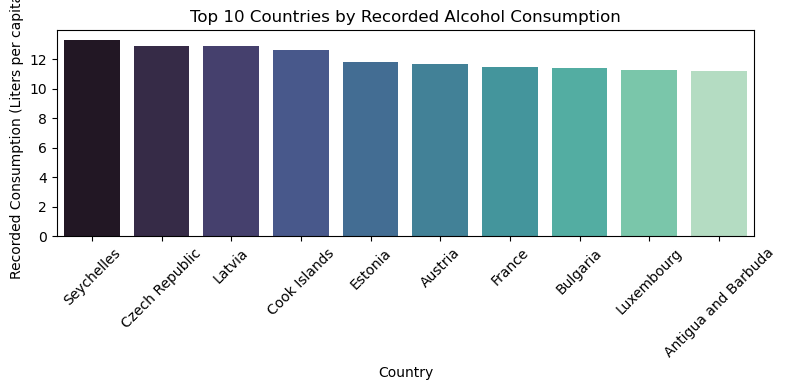

In [98]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top10, x="Country", y="Recorded Consumption", palette="mako")
plt.title("Top 10 Countries by Recorded Alcohol Consumption")
plt.xlabel("Country")
plt.ylabel("Recorded Consumption (Liters per capita)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comparing the alcohol types by recorded consumption for the top 10 countries:

In [42]:
melted = top10.melt(id_vars='Country', value_vars=["Beer (%)", "Wine (%)", "Spirits (%)"],
                    var_name='Alcohol Type', value_name='Percentage')

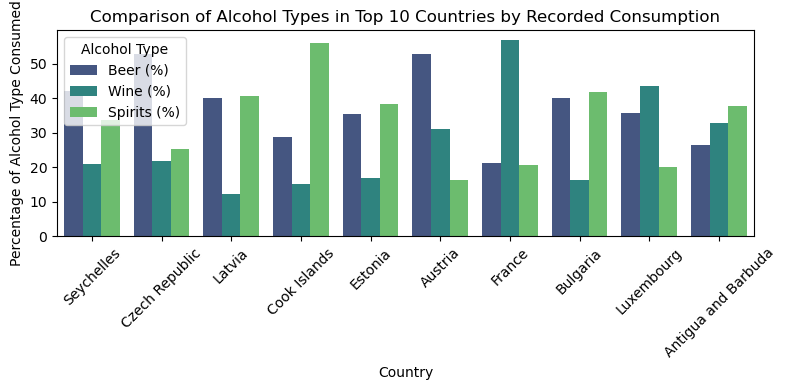

In [99]:
plt.figure(figsize=(8, 4))
sns.barplot(data=melted, x='Country', y='Percentage', hue='Alcohol Type', palette='viridis')
plt.title("Comparison of Alcohol Types in Top 10 Countries by Recorded Consumption")
plt.xlabel("Country")
plt.ylabel("Percentage of Alcohol Type Consumed")
plt.xticks(rotation=45)
plt.legend(title="Alcohol Type")
plt.tight_layout()
plt.show()

### Total consumtion of liquor by type of alohol using a pie chart :

In [37]:
total_by_type = df[["Beer (%)", "Wine (%)", "Spirits (%)", "Other (%)"]].sum()

In [38]:
total_by_type

Beer (%)       7876.6
Wine (%)       2764.1
Spirits (%)    5967.6
Other (%)      1995.8
dtype: float64

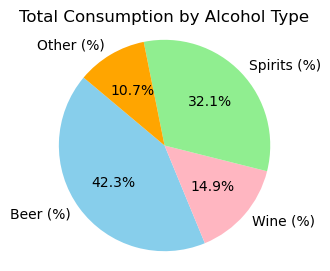

In [51]:
plt.figure(figsize=(3, 3))
plt.pie(total_by_type, labels=totals.index, autopct='%1.1f%%', startangle=140, colors=["Skyblue", "Lightpink", "Lightgreen", "Orange"])
plt.title("Total Consumption by Alcohol Type")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Analysing Actual Vs Projected consumption using a barplot: 

In [47]:
actual_vs_projection = top10.melt(id_vars='Country', value_vars=["Recorded Consumption", "2025 projection", "2030 projection"],
                    var_name='Type', value_name='Consumption')

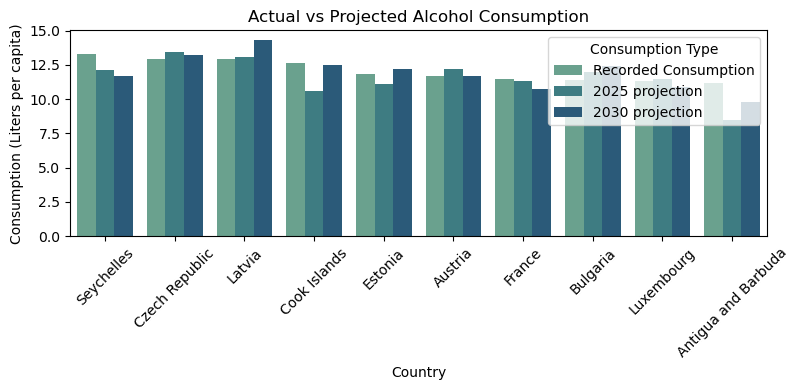

In [100]:
plt.figure(figsize=(8, 4))
sns.barplot(data=actual_vs_projection, x='Country', y='Consumption', hue='Type', palette='crest')
plt.title("Actual vs Projected Alcohol Consumption")
plt.xlabel("Country")
plt.ylabel("Consumption (Liters per capita)")
plt.xticks(rotation=45)
plt.legend(title="Consumption Type")
plt.tight_layout()
plt.show()

## Analysing Matrices pertaining to India and few neighbouring countries
#### Heat map for the consumption in India and its neighboring countries:

In [84]:
selected_countries = df[df["Country"].isin(["India", "China", "Pakistan", "Nepal"])]
pivot_df = selected_countries.set_index("Country")[["Recorded Consumption", 
                                                               "Unrecorded Consumption",
                                                               "2025 projection",
                                                               "2030 projection"]]

In [90]:
selected_countries

,Country,Recorded Consumption,Unrecorded Consumption,Beer (%),Wine (%),Spirits (%),Other (%),2025 projection,2030 projection
81,China,4.8,0.9,28.4,3.0,68.5,0.1,5.0,5.5
102,India,3.0,1.9,7.1,0.1,92.8,0.1,5.0,6.7
144,Nepal,0.8,0.6,28.3,0.6,71.1,0.1,1.5,1.6
179,Pakistan,0.1,0.1,7.7,0.1,68.7,23.6,0.1,0.1


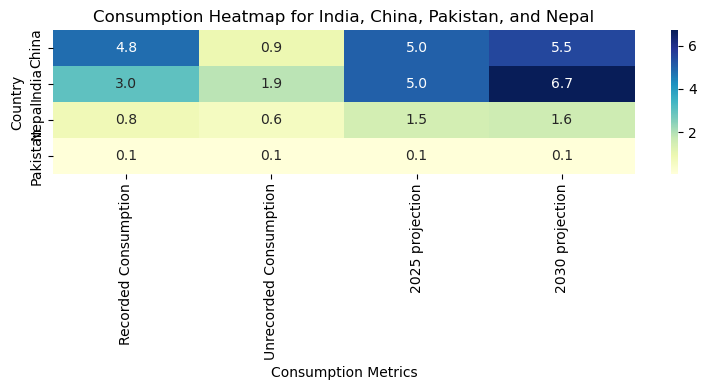

In [101]:
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Consumption Heatmap for India, China, Pakistan, and Nepal")
plt.ylabel("Country")
plt.xlabel("Consumption Metrics")
plt.tight_layout()
plt.show()

## Creating a scatter plot for the recorded consumption in respect to the type of liquor:

In [86]:
#Creating another pivot_df:
pivot_df_1 = selected_countries.set_index("Country")[["Recorded Consumption", 
                                                               "Unrecorded Consumption",
                                                               "2025 projection",
                                                               "Beer (%)", 
                                                               "Wine (%)", 
                                                               "Spirits (%)",
                                                               "2030 projection"]]


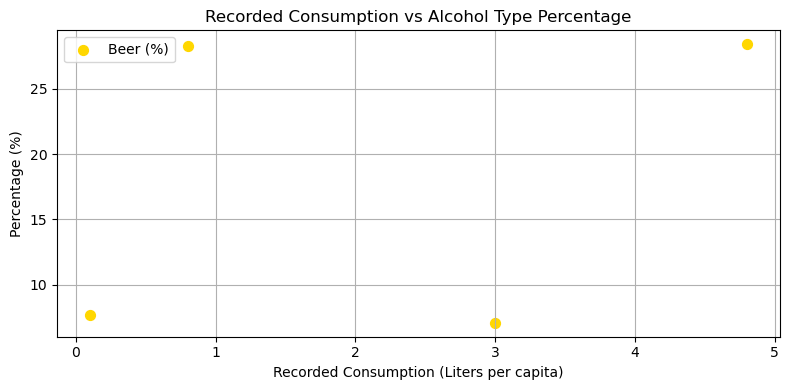

In [91]:
#Plotting a scatter plot for each type vs recorded consumption: 
plt.figure(figsize=(8, 4))

#Beer
plt.scatter(pivot_df_1["Recorded Consumption"], pivot_df_1["Beer (%)"], label="Beer (%)", color="gold", s=50, marker='o')

plt.title("Recorded Consumption vs Alcohol Type Percentage")
plt.xlabel("Recorded Consumption (Liters per capita)")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

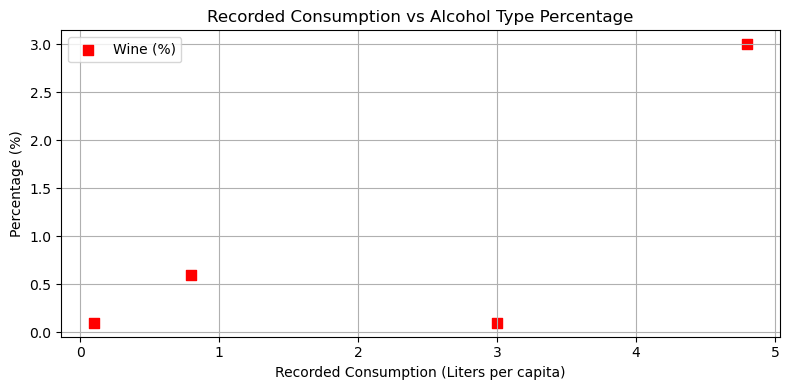

In [92]:
plt.figure(figsize=(8, 4))

# Wine
plt.scatter(pivot_df_1["Recorded Consumption"], pivot_df_1["Wine (%)"], label="Wine (%)", color="red", s=50, marker='s')

plt.title("Recorded Consumption vs Alcohol Type Percentage")
plt.xlabel("Recorded Consumption (Liters per capita)")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

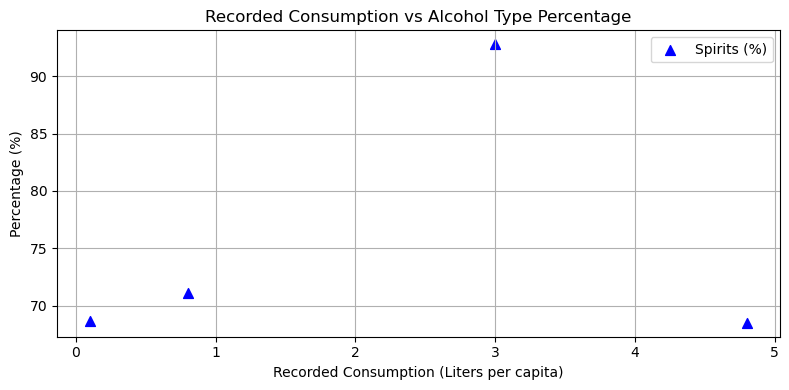

In [93]:
plt.figure(figsize=(8, 4))

# Spirits
plt.scatter(pivot_df_1["Recorded Consumption"], pivot_df_1["Spirits (%)"], label="Spirits (%)", color="blue", s=50, marker='^')

plt.title("Recorded Consumption vs Alcohol Type Percentage")
plt.xlabel("Recorded Consumption (Liters per capita)")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Pair Plots to show the relationship betweeen multiple numeric variables

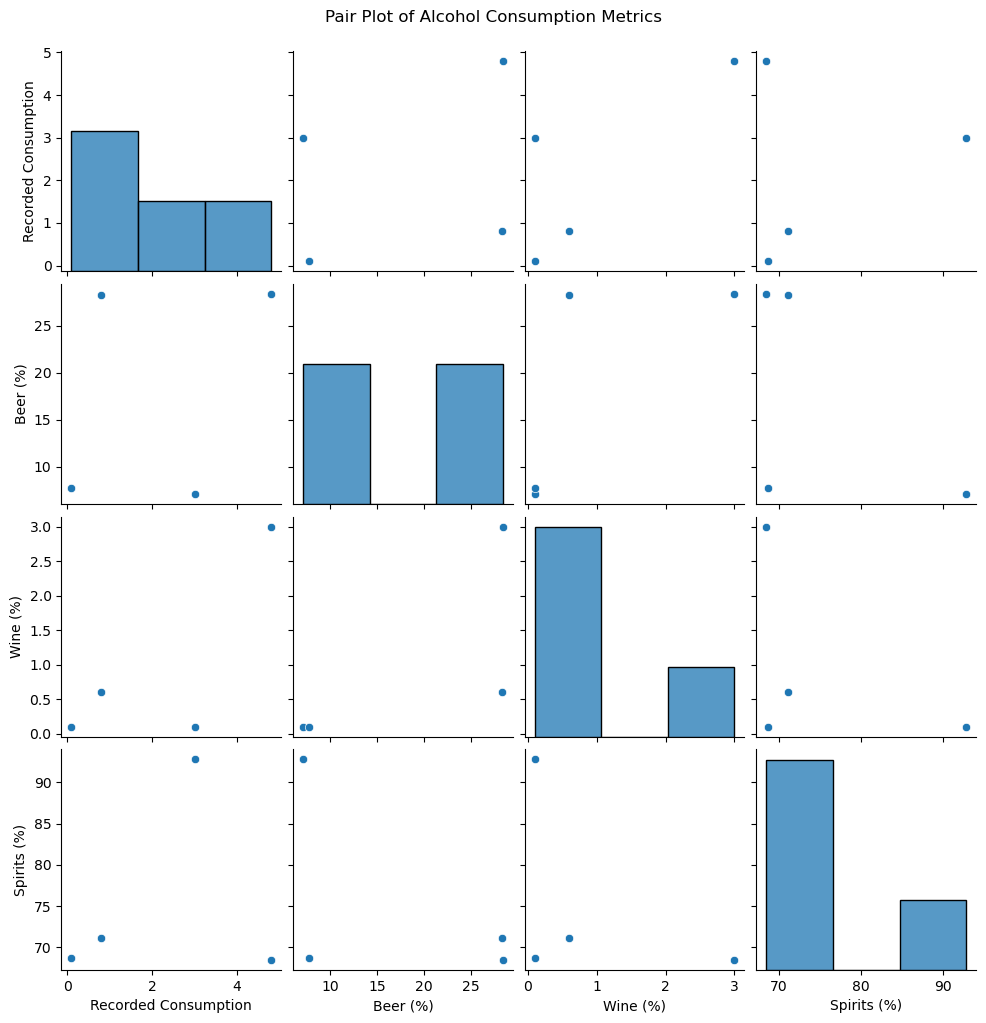

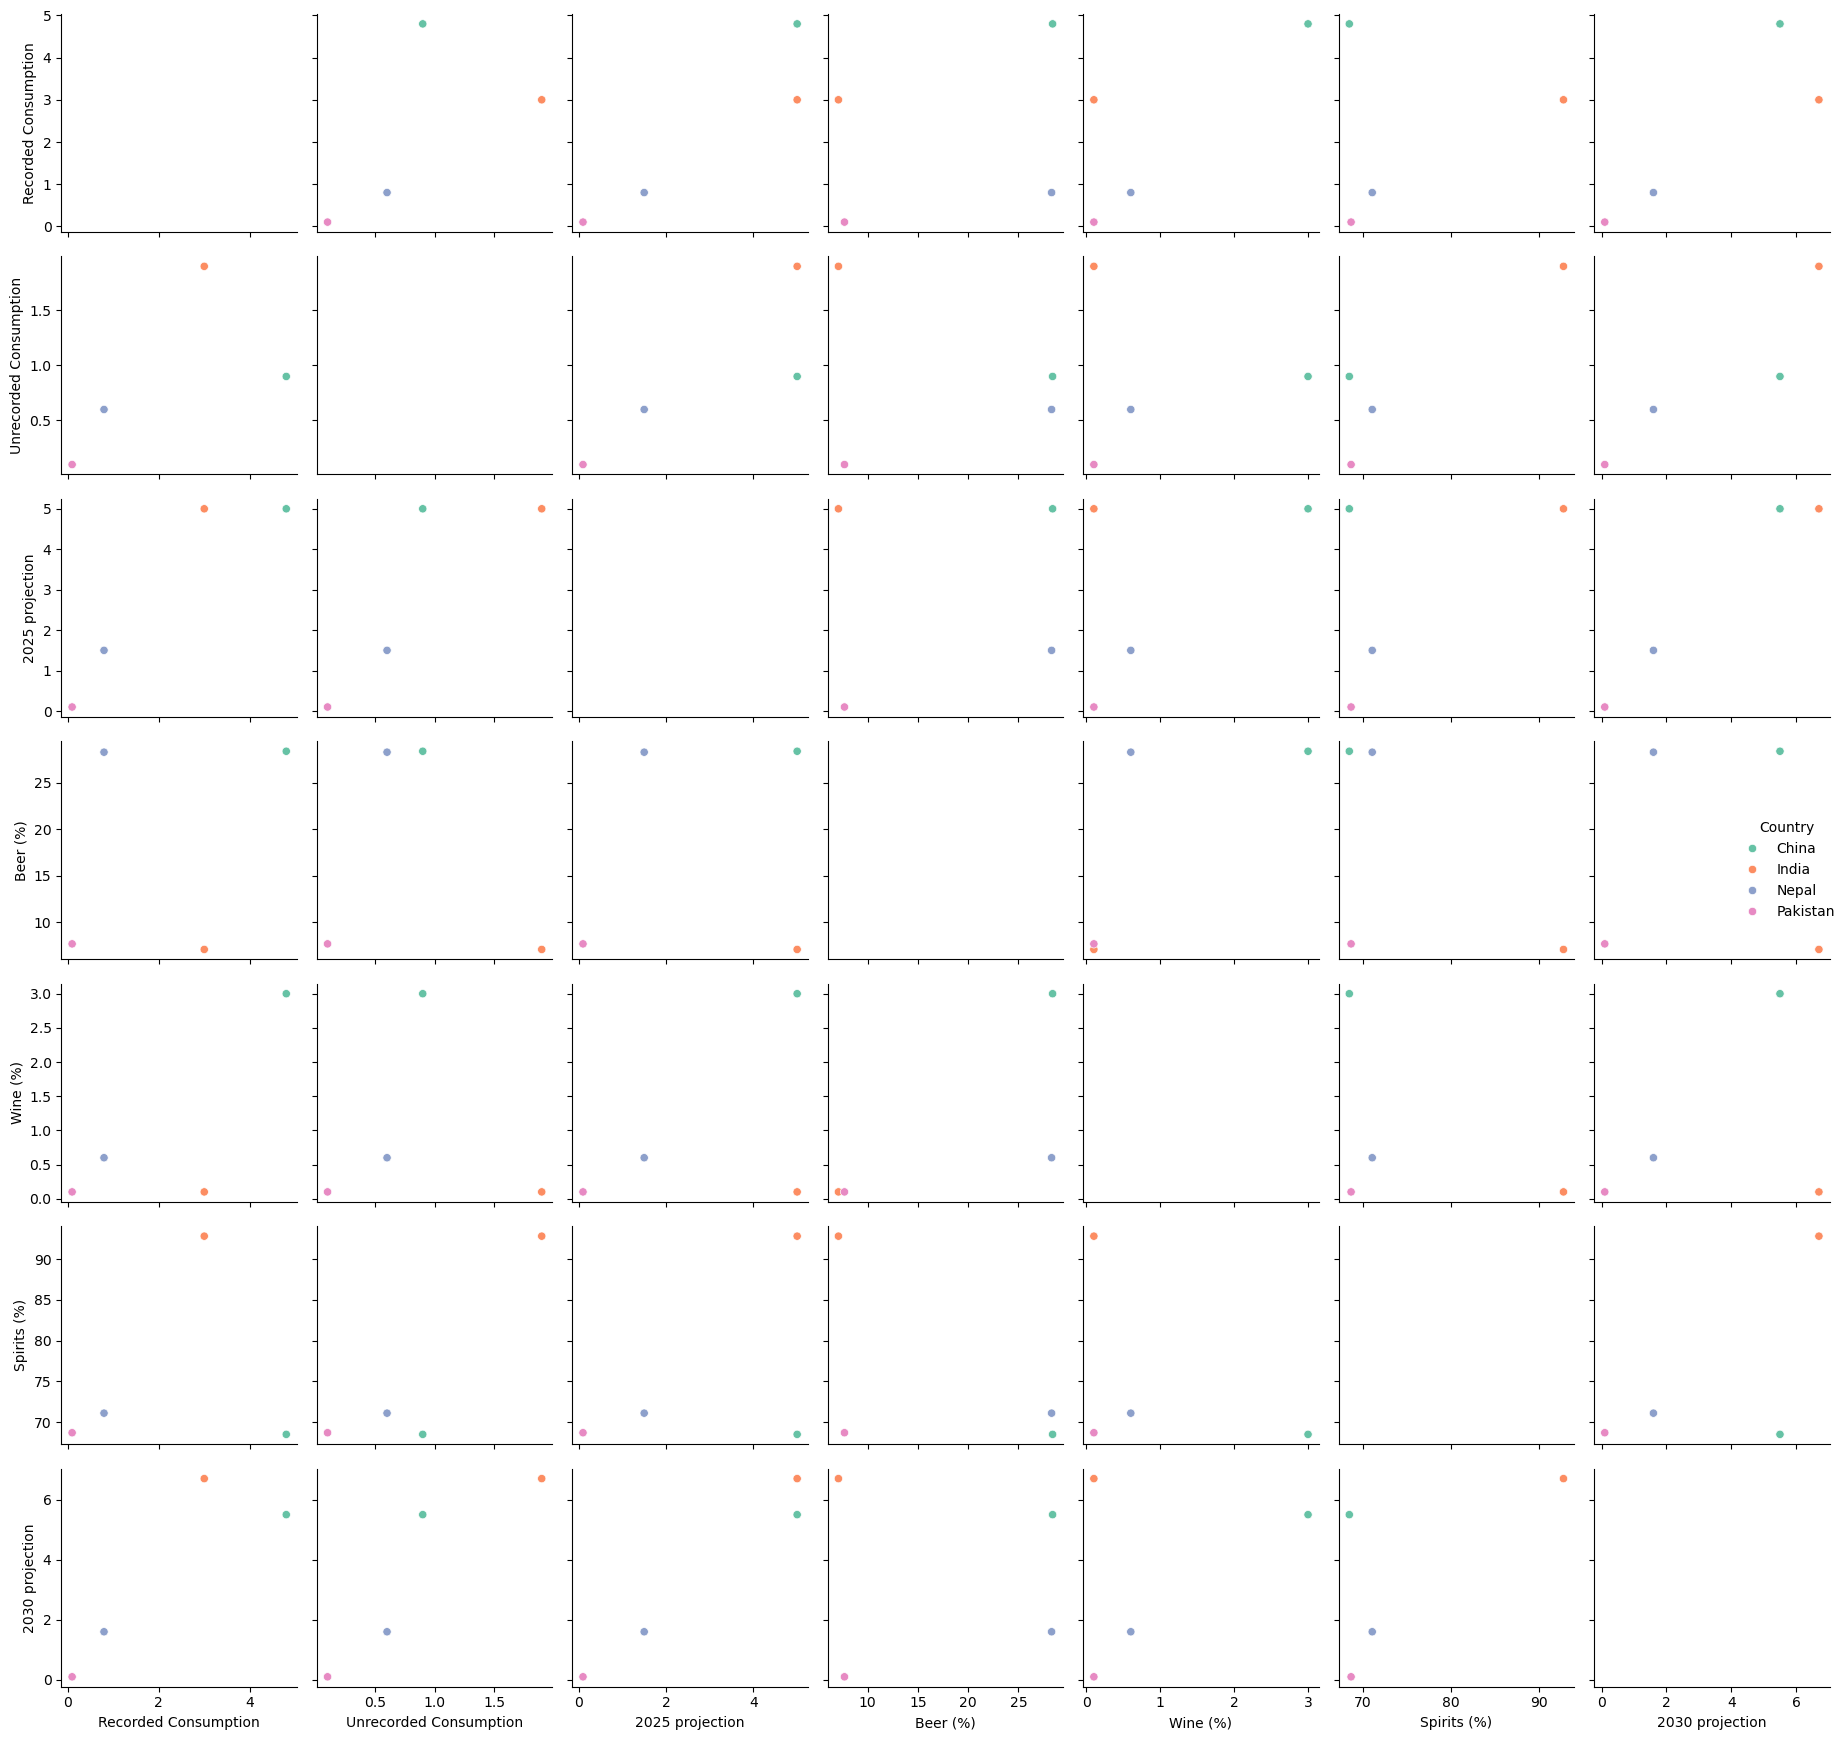

In [109]:
sns.pairplot(pivot_df_1[["Recorded Consumption", "Beer (%)", "Wine (%)", "Spirits (%)"]])
plt.suptitle("Pair Plot of Alcohol Consumption Metrics", y=1.02)
sns.pairplot(pivot_df_1.reset_index(), hue='Country', palette='Set2')
plt.tight_layout()
plt.show()

### Box plot to visualize the distribution of recorded and unrecorded consumption for each country:

In [110]:
plot_df = pivot_df.reset_index()

In [111]:
melted = plot_df.melt(id_vars='Country',
                      value_vars=["Recorded Consumption", "Unrecorded Consumption"],
                      var_name='Consumption Type',
                      value_name='Liters per capita')

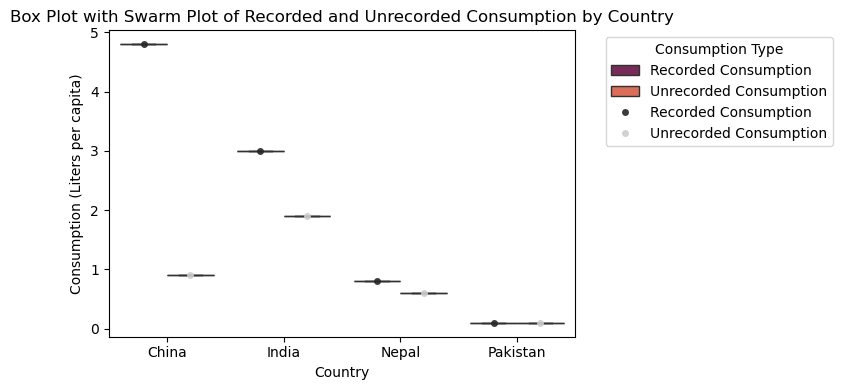

In [127]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=melted,
    x='Country',
    y='Liters per capita',
    hue='Consumption Type',
    palette='rocket'
)



sns.swarmplot(
    data=melted,
    x='Country',
    y='Liters per capita',
    hue='Consumption Type',
    dodge=True,
    marker='o',
    alpha=0.9,
    palette='dark:.8'
)

# Final touches
plt.title("Box Plot with Swarm Plot of Recorded and Unrecorded Consumption by Country")
plt.xlabel("Country")
plt.ylabel("Consumption (Liters per capita)")
plt.legend(title="Consumption Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()